In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [2]:
start='2010-01-01'
end='2020-12-31'

df=data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.444284,30.104570,88102679.0,28.702583
2010-01-04,30.642857,30.340000,30.500000,30.572857,123432050.0,29.149057
2010-01-05,30.798571,30.464285,30.684284,30.625713,150476004.0,29.199450
2010-01-06,30.747143,30.107141,30.625713,30.138571,138039594.0,28.734993
2010-01-07,30.285713,29.864285,30.240000,30.082857,119282324.0,28.681875


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930064.0,131.161407
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486237.0,135.852509
2020-12-29,138.789001,134.340897,138.050003,134.869995,121047324.0,134.043640
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452124.0,132.900711
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116586.0,131.877014


In [4]:
df=df.reset_index()                               #drops date as index col and converts it to date column
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.444284,30.104570,88102679.0,28.702583
1,2010-01-04,30.642857,30.340000,30.500000,30.572857,123432050.0,29.149057
2,2010-01-05,30.798571,30.464285,30.684284,30.625713,150476004.0,29.199450
3,2010-01-06,30.747143,30.107141,30.625713,30.138571,138039594.0,28.734993
4,2010-01-07,30.285713,29.864285,30.240000,30.082857,119282324.0,28.681875


In [5]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,30.478571,30.080000,30.444284,30.104570,88102679.0
1,30.642857,30.340000,30.500000,30.572857,123432050.0
2,30.798571,30.464285,30.684284,30.625713,150476004.0
3,30.747143,30.107141,30.625713,30.138571,138039594.0
4,30.285713,29.864285,30.240000,30.082857,119282324.0


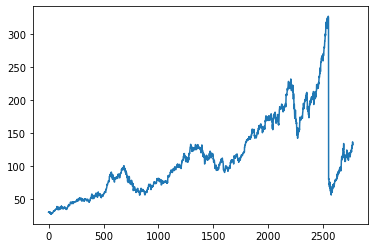

In [6]:
plt.plot(df.Close)

## Moving Averages(mean of previous 100 closing values)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    118.223425
2766    118.489700
2767    118.699375
2768    118.925450
2769    119.125075
Name: Close, Length: 2770, dtype: float64

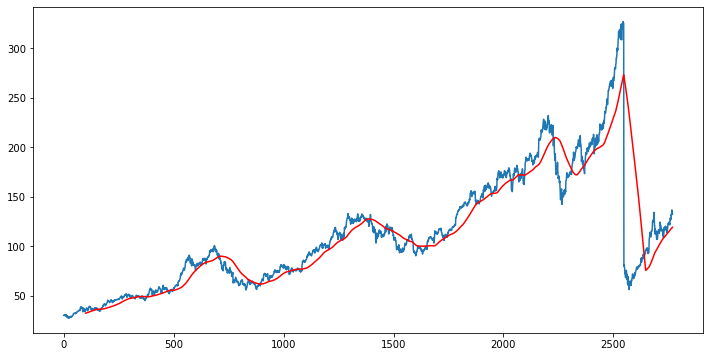

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765     99.158337
2766     99.494325
2767     99.865912
2768    100.218437
2769    100.573550
Name: Close, Length: 2770, dtype: float64

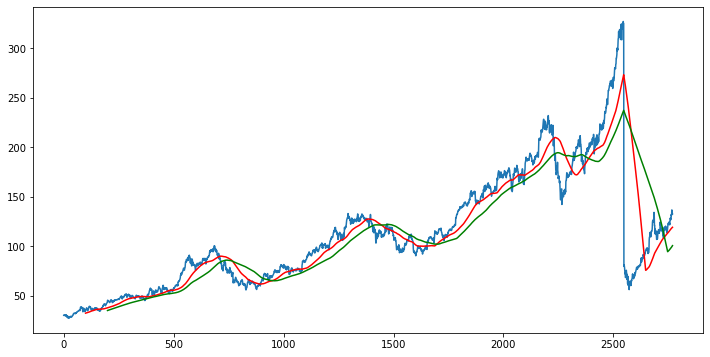

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

## Splitting data into train and test

In [11]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


##### Since the Close values are very high we need to scale them down, for this we will use min max 

In [12]:
#from sklearn.preprocessing import MinMaxScalar
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.0195357 ],
       [0.0229635 ],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [14]:
data_testing_array=scaler.fit_transform(data_testing)
data_testing_array

array([[0.38197944],
       [0.37692611],
       [0.38282785],
       [0.37836465],
       [0.37858596],
       [0.36877439],
       [0.35888899],
       [0.35335613],
       [0.34841345],
       [0.35796684],
       [0.36198737],
       [0.35848324],
       [0.36158163],
       [0.36043818],
       [0.36290952],
       [0.35922094],
       [0.36626613],
       [0.36593418],
       [0.36792598],
       [0.36814729],
       [0.37054489],
       [0.36851617],
       [0.37216787],
       [0.38282785],
       [0.38500409],
       [0.38238518],
       [0.36844238],
       [0.36943831],
       [0.36914322],
       [0.37257362],
       [0.37002849],
       [0.37371707],
       [0.39452062],
       [0.40805768],
       [0.41661514],
       [0.40868473],
       [0.41318479],
       [0.42937763],
       [0.43583263],
       [0.43789822],
       [0.44317291],
       [0.44184503],
       [0.43738183],
       [0.43479984],
       [0.42509887],
       [0.41676271],
       [0.42421365],
       [0.420

In [15]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train= np.array(x_train)
y_train= np.array(y_train)

In [16]:
x_train.shape

(1838, 100, 1)

In [17]:
y_train.shape

(1838,)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [19]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=(x_train.shape[1],1)))   #input_shape--> 1 refers to column 1 i.e close
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [22]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 11s 139ms/step - loss: 0.0420
Epoch 2/50
58/58 [==============================] - 8s 143ms/step - loss: 0.0097
Epoch 3/50
58/58 [==============================] - 7s 128ms/step - loss: 0.0075
Epoch 4/50
58/58 [==============================] - 8s 140ms/step - loss: 0.0068
Epoch 5/50
58/58 [==============================] - 9s 160ms/step - loss: 0.0070
Epoch 6/50
58/58 [==============================] - 8s 142ms/step - loss: 0.0055
Epoch 7/50
58/58 [==============================] - 9s 161ms/step - loss: 0.0058
Epoch 8/50
58/58 [==============================] - 9s 159ms/step - loss: 0.0048
Epoch 9/50
58/58 [==============================] - 10s 170ms/step - loss: 0.0052
Epoch 10/50
58/58 [==============================] - 9s 159ms/step - loss: 0.0050
Epoch 11/50
58/58 [==============================] - 10s 165ms/step - loss: 0.00470s - loss: 0.00
Epoch 12/50
58/58 [==============================] - 9s 160ms/step - loss: 0.0047
Epoch 1

In [23]:
model.save('keras_model.h5')

In [24]:
#we require last 100 days data for prediction on that day
# so we will find data from training dataset and append here 
past_100_days=data_training.tail(100)

In [25]:
final_df=past_100_days.append(data_testing, ignore_index=True)
final_df.head()

,Close
0,142.270004
1,143.639999
2,144.529999
3,143.679993
4,143.789993


In [26]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.31787207],
       [0.32292539],
       [0.32620822],
       [0.32307291],
       [0.32347866],
       [0.32296226],
       [0.33376981],
       [0.33720016],
       [0.33554031],
       [0.33358537],
       [0.34254863],
       [0.35748731],
       [0.36110215],
       [0.35840945],
       [0.36095458],
       [0.36888505],
       [0.36740958],
       [0.36656123],
       [0.34730687],
       [0.35575368],
       [0.35767175],
       [0.36110215],
       [0.36040131],
       [0.35870455],
       [0.36065949],
       [0.35970048],
       [0.35992178],
       [0.35656517],
       [0.35811436],
       [0.36648744],
       [0.36088079],
       [0.36279887],
       [0.36619235],
       [0.36479073],
       [0.34262236],
       [0.32949105],
       [0.33380667],
       [0.32853204],
       [0.32532294],
       [0.31787207],
       [0.33288453],
       [0.32797872],
       [0.3311509 ],
       [0.33026568],
       [0.33266323],
       [0.33096651],
       [0.32325735],
       [0.331

In [27]:
input_data.shape

(932, 1)

In [28]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test= np.array(x_test)
y_test= np.array(y_test)

In [29]:
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [30]:
#making predictions
y_predicted=model.predict(x_test)


In [31]:
y_predicted.shape

(832, 1)

In [32]:
y_test

array([0.38197944, 0.37692611, 0.38282785, 0.37836465, 0.37858596,
       0.36877439, 0.35888899, 0.35335613, 0.34841345, 0.35796684,
       0.36198737, 0.35848324, 0.36158163, 0.36043818, 0.36290952,
       0.35922094, 0.36626613, 0.36593418, 0.36792598, 0.36814729,
       0.37054489, 0.36851617, 0.37216787, 0.38282785, 0.38500409,
       0.38238518, 0.36844238, 0.36943831, 0.36914322, 0.37257362,
       0.37002849, 0.37371707, 0.39452062, 0.40805768, 0.41661514,
       0.40868473, 0.41318479, 0.42937763, 0.43583263, 0.43789822,
       0.44317291, 0.44184503, 0.43738183, 0.43479984, 0.42509887,
       0.41676271, 0.42421365, 0.42070946, 0.42008241, 0.43173831,
       0.43845154, 0.43848841, 0.43524245, 0.43148014, 0.41823812,
       0.42698008, 0.42402921, 0.41941849, 0.41882831, 0.41650449,
       0.41764799, 0.41783238, 0.43000468, 0.42642676, 0.42852927,
       0.42834483, 0.43479984, 0.44383683, 0.43690229, 0.43620151,
       0.43863593, 0.43863593, 0.42225871, 0.42236936, 0.42413

In [33]:
y_predicted

array([[0.38112897],
       [0.3810886 ],
       [0.38070834],
       [0.38002715],
       [0.37908056],
       [0.37792382],
       [0.37654018],
       [0.37484556],
       [0.37274706],
       [0.37017456],
       [0.36727417],
       [0.36430457],
       [0.36143097],
       [0.35880634],
       [0.35654765],
       [0.35472482],
       [0.353347  ],
       [0.3524372 ],
       [0.35198456],
       [0.35196385],
       [0.35232025],
       [0.35300097],
       [0.35393173],
       [0.35505736],
       [0.3564366 ],
       [0.3581441 ],
       [0.36017057],
       [0.3622396 ],
       [0.36409432],
       [0.36554816],
       [0.36654878],
       [0.3670888 ],
       [0.36724386],
       [0.3673439 ],
       [0.36787444],
       [0.36918628],
       [0.3713443 ],
       [0.37427852],
       [0.3780317 ],
       [0.3825365 ],
       [0.38768247],
       [0.3933469 ],
       [0.39933336],
       [0.40527064],
       [0.41070879],
       [0.41515395],
       [0.41820845],
       [0.419

In [34]:
scaler.scale_

array([0.00368857])

In [35]:
scale_factor=1/0.00368857
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

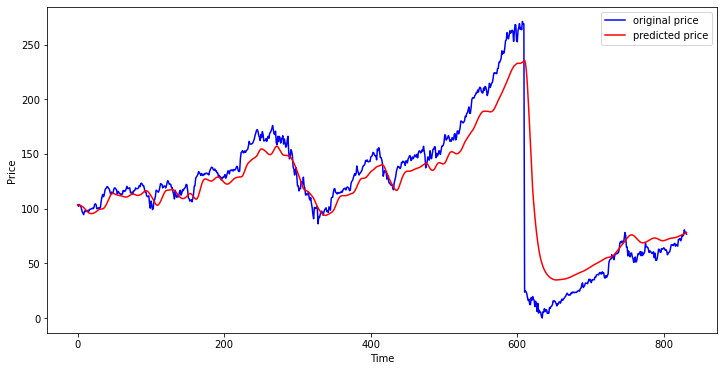

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='original price')
plt.plot(y_predicted, 'r', label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()